In [18]:
import pandas as pd


In [19]:
# load oxygen and nitrate datasets
oxygen_df = pd.read_csv('Oxygen_Demand.csv', sep=';')
nitrate_df = pd.read_csv('oxidized_nitrogen.csv', sep=';')



# Convert Sample.Date into Year column
oxygen_df['Year'] = pd.to_datetime(oxygen_df['Sample.Date']).dt.year
nitrate_df['Year'] = pd.to_datetime(nitrate_df['Sample.Date']).dt.year



/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_20617/3403621567.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  oxygen_df = pd.read_csv('Oxygen_Demand.csv', sep=';')
/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_20617/3403621567.py:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  nitrate_df = pd.read_csv('oxidized_nitrogen.csv', sep=';')


In [20]:
# merge with station metadata to get 'Country Name'
station_metadata = pd.read_csv('GEMStat_station_metadata.csv', sep=';', encoding='ISO-8859-1')

# Merge oxygen data
oxygen_df = pd.merge(oxygen_df, station_metadata[['GEMS Station Number', 'Country Name']], how='left', left_on='GEMS.Station.Number', right_on='GEMS Station Number')

# Merge nitrate data
nitrate_df = pd.merge(nitrate_df, station_metadata[['GEMS Station Number', 'Country Name']], how='left', left_on='GEMS.Station.Number', right_on='GEMS Station Number')


In [21]:
# Group by Country Name and Year and calculate mean
oxygen_avg = oxygen_df.groupby(['Country Name', 'Year'])['Value'].mean().reset_index()
nitrate_avg = nitrate_df.groupby(['Country Name', 'Year'])['Value'].mean().reset_index()


In [22]:
# Merge both averages on Country and Year
merged_df = pd.merge(oxygen_avg, nitrate_avg, on=['Country Name', 'Year'], suffixes=('_oxygen', '_nitrate'))

# Preview
print(merged_df.head())


  Country Name  Year  Value_oxygen  Value_nitrate
0    Argentina  2011     14.000000       1.865000
1    Argentina  2012      3.625000       1.928750
2    Argentina  2013      8.875000       1.645000
3    Argentina  2021      9.000000       0.657443
4      Austria  2014      2.037671       3.376383


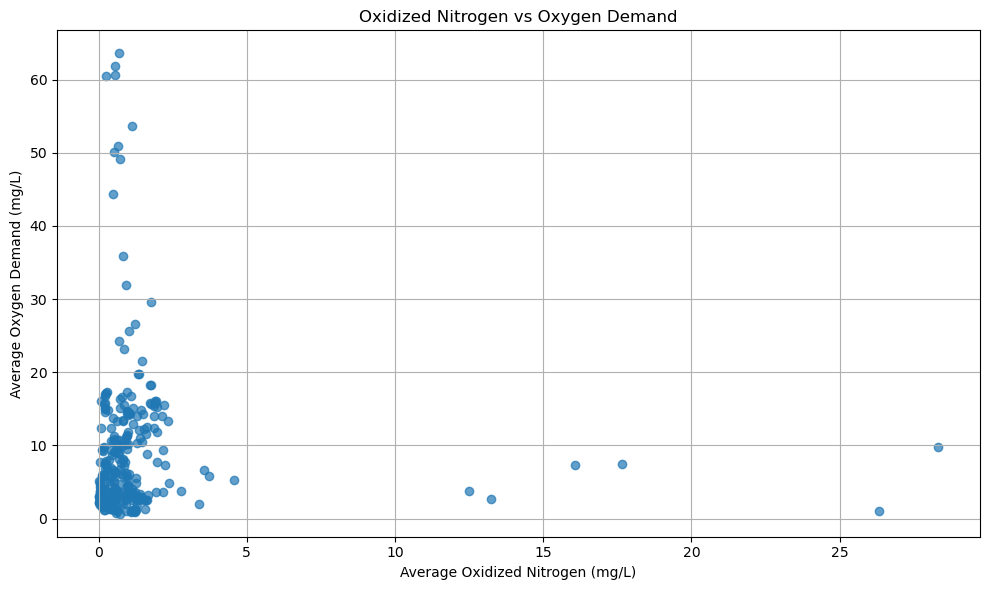

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Value_nitrate'], merged_df['Value_oxygen'], alpha=0.7)
plt.title('Oxidized Nitrogen vs Oxygen Demand')
plt.xlabel('Average Oxidized Nitrogen (mg/L)')
plt.ylabel('Average Oxygen Demand (mg/L)')
plt.grid(True)
plt.tight_layout()
plt.show()


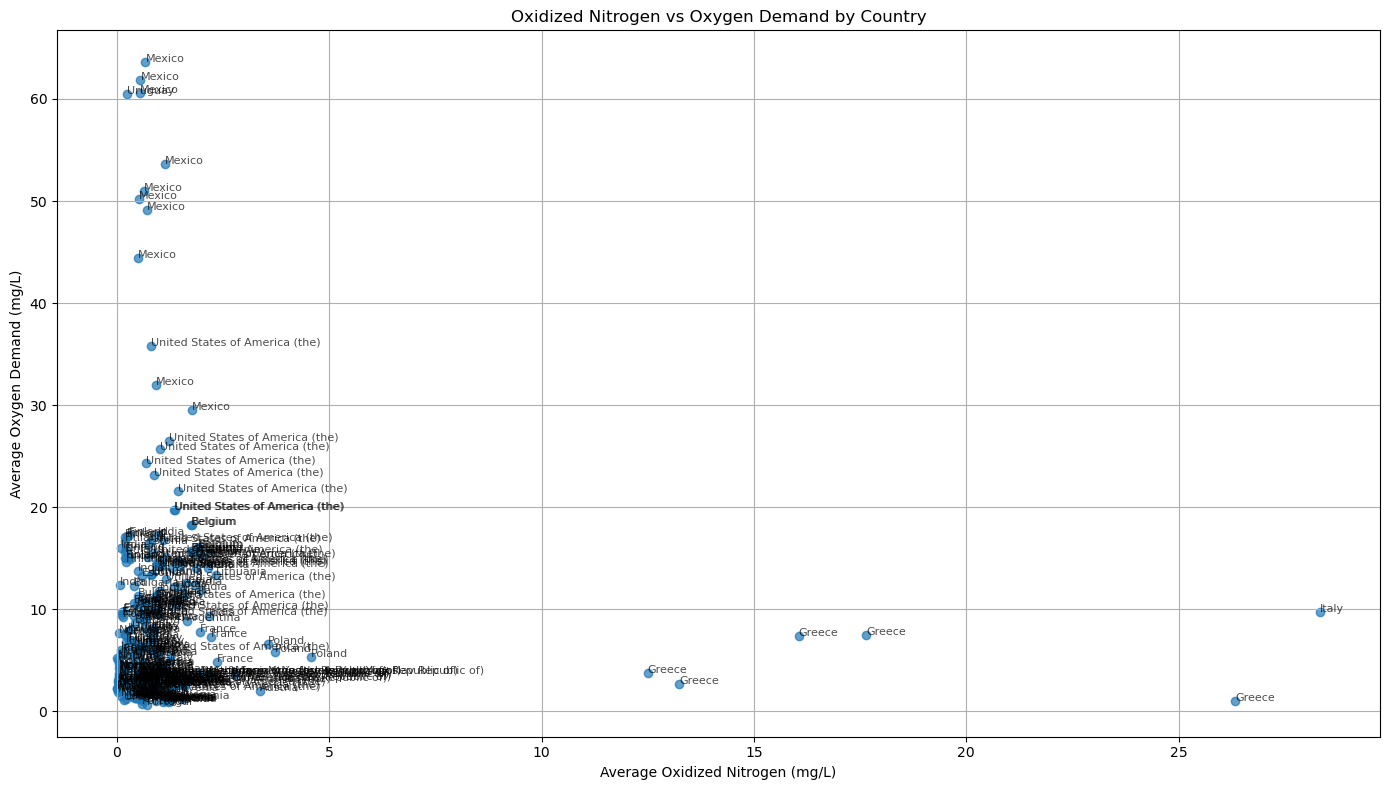

In [24]:
plt.figure(figsize=(14, 8))
plt.scatter(merged_df['Value_nitrate'], merged_df['Value_oxygen'], alpha=0.7)

# Add country labels to each point
for i in range(len(merged_df)):
    plt.text(merged_df['Value_nitrate'][i], merged_df['Value_oxygen'][i], merged_df['Country Name'][i], fontsize=8, alpha=0.7)

plt.title('Oxidized Nitrogen vs Oxygen Demand by Country')
plt.xlabel('Average Oxidized Nitrogen (mg/L)')
plt.ylabel('Average Oxygen Demand (mg/L)')
plt.grid(True)
plt.tight_layout()
plt.show()

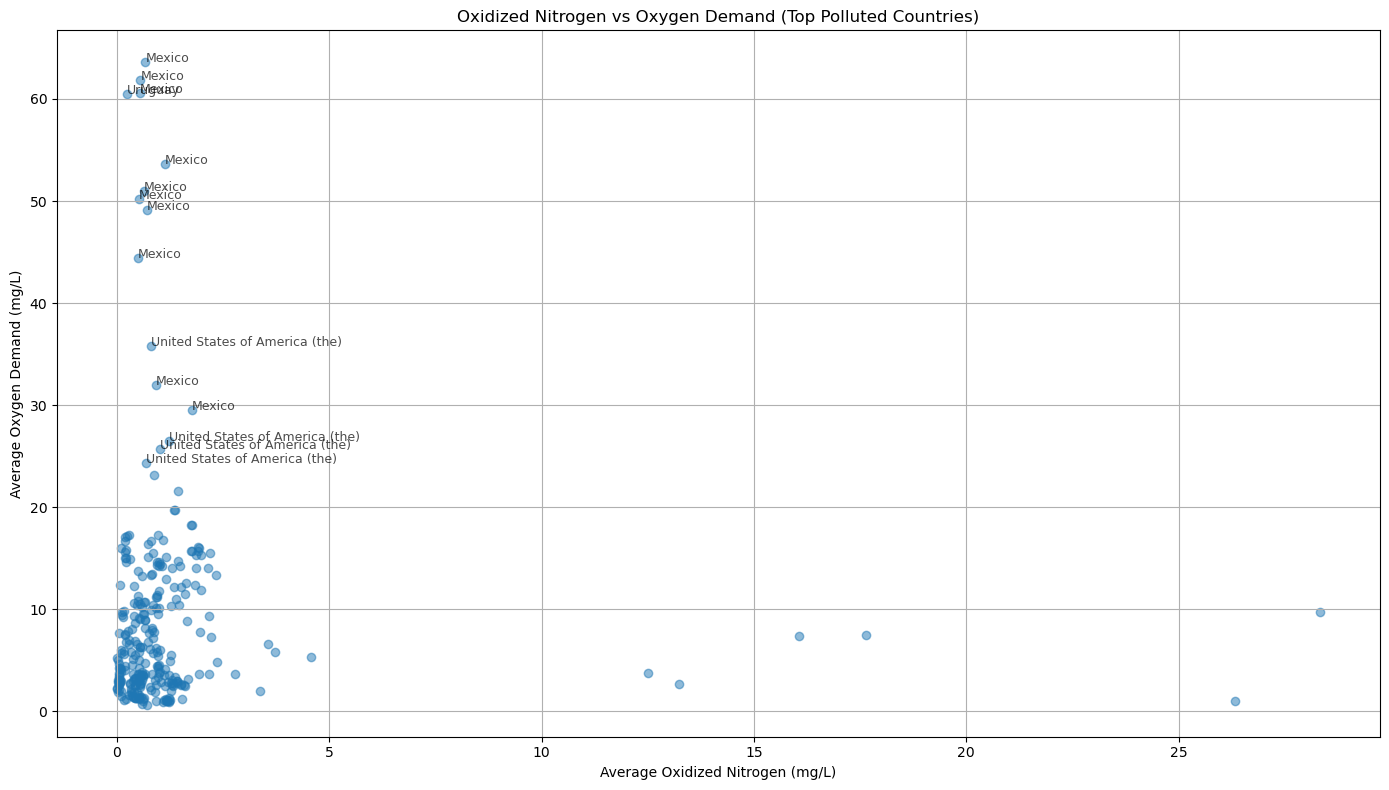

In [25]:
import matplotlib.pyplot as plt

# Only select top 15 countries by oxygen demand 
top_polluted = merged_df.sort_values(by='Value_oxygen', ascending=False).head(15)

plt.figure(figsize=(14, 8))
plt.scatter(merged_df['Value_nitrate'], merged_df['Value_oxygen'], alpha=0.5)

# Label only the top polluted countries
for i in range(len(top_polluted)):
    plt.text(top_polluted['Value_nitrate'].iloc[i],
             top_polluted['Value_oxygen'].iloc[i],
             top_polluted['Country Name'].iloc[i],
             fontsize=9, alpha=0.7)

plt.title('Oxidized Nitrogen vs Oxygen Demand (Top Polluted Countries)')
plt.xlabel('Average Oxidized Nitrogen (mg/L)')
plt.ylabel('Average Oxygen Demand (mg/L)')
plt.grid(True)
plt.tight_layout()
plt.show()


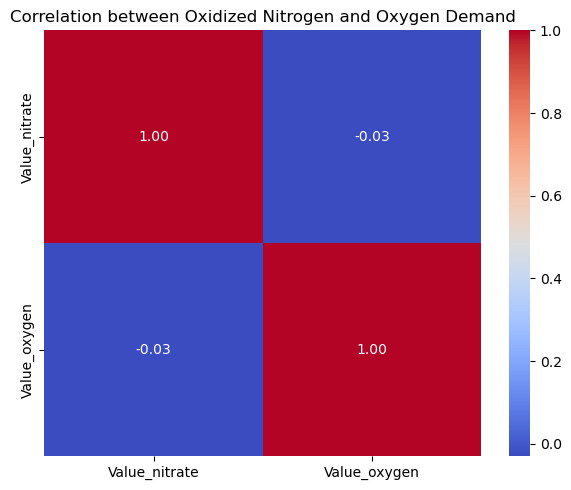

In [26]:
import seaborn as sns

# Create a smaller DataFrame just for correlation
corr_data = merged_df[['Value_nitrate', 'Value_oxygen']]

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Oxidized Nitrogen and Oxygen Demand')
plt.tight_layout()
plt.show()


# Forecasting

In [12]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

# Load datasets 
nitrate_raw = pd.read_csv('oxidized_nitrogen.csv', sep=';')
oxygen_raw = pd.read_csv('Oxygen_Demand.csv', sep=';')

# Convert date to datetime
nitrate_raw['Sample.Date'] = pd.to_datetime(nitrate_raw['Sample.Date'], errors='coerce')
oxygen_raw['Sample.Date'] = pd.to_datetime(oxygen_raw['Sample.Date'], errors='coerce')

# Drop rows with missing values
nitrate_clean = nitrate_raw.dropna(subset=['Sample.Date', 'Value'])
oxygen_clean = oxygen_raw.dropna(subset=['Sample.Date', 'Value'])

# Group by date and take average for each day
nitrate_df = nitrate_clean.groupby('Sample.Date')['Value'].mean().reset_index()
oxygen_df = oxygen_clean.groupby('Sample.Date')['Value'].mean().reset_index()

# Rename columns to fit Prophet format
nitrate_df.columns = ['ds', 'y']
oxygen_df.columns = ['ds', 'y']


/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_20617/410694419.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  nitrate_raw = pd.read_csv('oxidized_nitrogen.csv', sep=';')
/var/folders/tq/7vkyx62523b_ly0hh2lnbrc80000gn/T/ipykernel_20617/410694419.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  oxygen_raw = pd.read_csv('Oxygen_Demand.csv', sep=';')


07:17:53 - cmdstanpy - INFO - Chain [1] start processing
07:18:27 - cmdstanpy - INFO - Chain [1] done processing
07:18:37 - cmdstanpy - INFO - Chain [1] start processing
07:18:43 - cmdstanpy - INFO - Chain [1] done processing
/opt/miniconda3/envs/SP/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


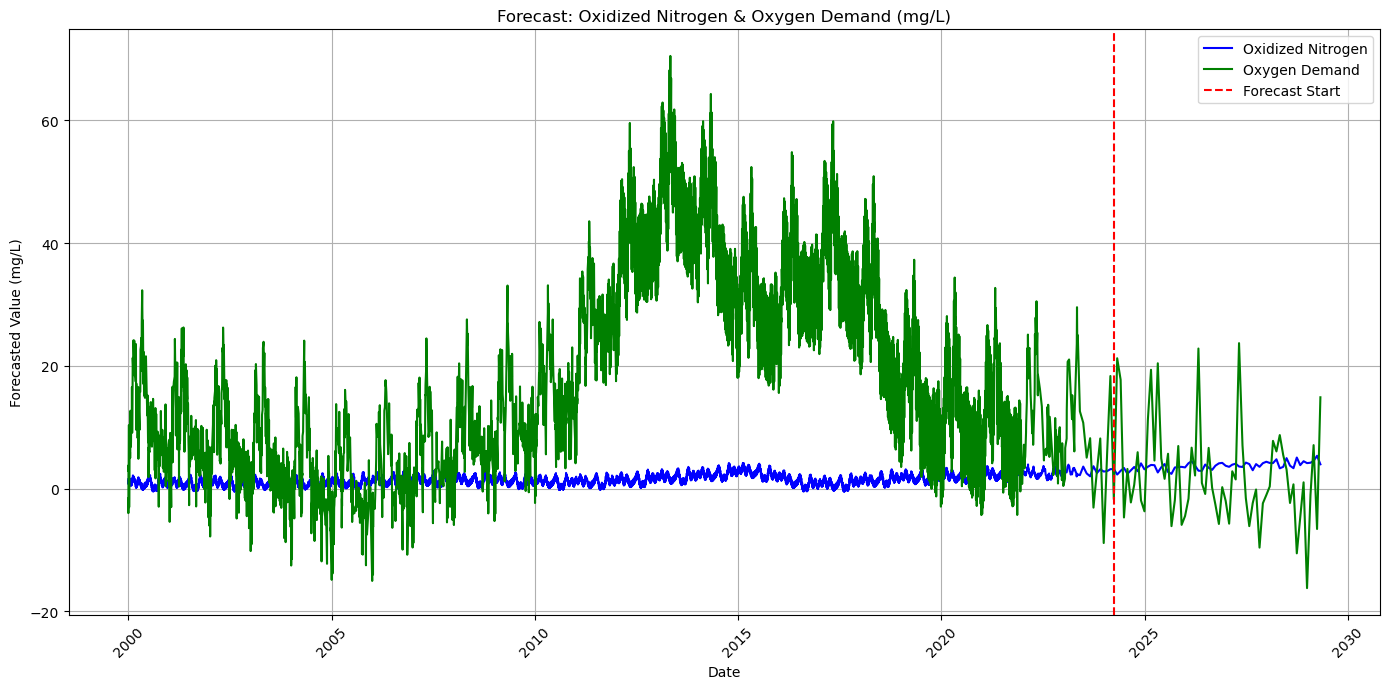

In [36]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Assume nitrate_df and oxygen_df already exist with 'ds' and 'y' columns

# Filter old data
nitrate_df = nitrate_df[nitrate_df['ds'] >= '2000-01-01']
oxygen_df = oxygen_df[oxygen_df['ds'] >= '2000-01-01']

# Fit models
model_nitrogen = Prophet()
model_nitrogen.fit(nitrate_df)

model_oxygen = Prophet()
model_oxygen.fit(oxygen_df)

# Create future dataframe
#future_nitrogen = model_nitrogen.make_future_dataframe(periods=36, freq='M')
#future_oxygen = model_oxygen.make_future_dataframe(periods=36, freq='M')

# Forecast until 2030
years_to_forecast = 2030 - 2024  # Number of years from now until 2030 (adjust if needed)
months_to_forecast = years_to_forecast * 12  # Convert to months

future_nitrogen = model_nitrogen.make_future_dataframe(periods=months_to_forecast, freq='M')
future_oxygen = model_oxygen.make_future_dataframe(periods=months_to_forecast, freq='M')


# Forecast
forecast_nitrogen = model_nitrogen.predict(future_nitrogen)
forecast_oxygen = model_oxygen.predict(future_oxygen)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(forecast_nitrogen['ds'], forecast_nitrogen['yhat'], label='Oxidized Nitrogen', color='blue')
plt.plot(forecast_oxygen['ds'], forecast_oxygen['yhat'], label='Oxygen Demand', color='green')

# After plt.plot() calls
plt.axvline(x=datetime.datetime(2024, 4, 1), color='red', linestyle='--', label='Forecast Start')  # whenever training data ends
plt.legend()

# X-axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.title('Forecast: Oxidized Nitrogen & Oxygen Demand (mg/L)')
plt.xlabel('Date')
plt.ylabel('Forecasted Value (mg/L)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




07:29:31 - cmdstanpy - INFO - Chain [1] start processing
07:30:07 - cmdstanpy - INFO - Chain [1] done processing
07:30:16 - cmdstanpy - INFO - Chain [1] start processing
07:30:22 - cmdstanpy - INFO - Chain [1] done processing
/opt/miniconda3/envs/SP/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


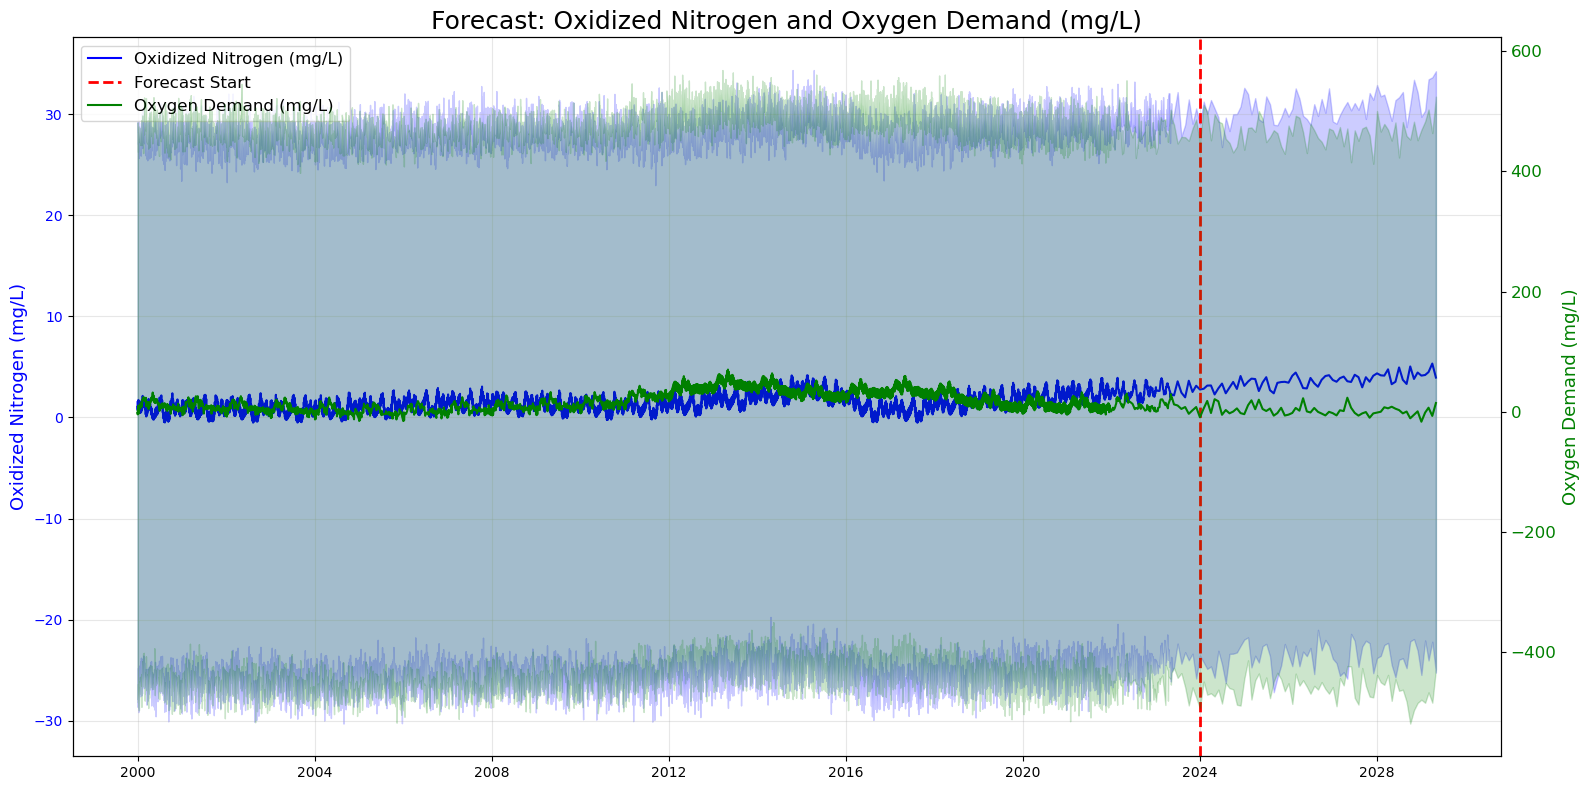

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

#Prepare datasets 
# Assuming nitrate_df and oxygen_df already exist
# and have 'ds' (date) and 'y' (value) columns

#  Train models
model_nitrogen = Prophet()
model_nitrogen.fit(nitrate_df)

model_oxygen = Prophet()
model_oxygen.fit(oxygen_df)

# Create future dataframe 
future_nitrogen = model_nitrogen.make_future_dataframe(periods=72, freq='M')  # 6 years
future_oxygen = model_oxygen.make_future_dataframe(periods=72, freq='M')

forecast_nitrogen = model_nitrogen.predict(future_nitrogen)
forecast_oxygen = model_oxygen.predict(future_oxygen)

# Plot 
fig, ax1 = plt.subplots(figsize=(16, 8))

# Primary y-axis for Nitrogen (blue)
ax1.plot(forecast_nitrogen['ds'], forecast_nitrogen['yhat'], color='blue', label='Oxidized Nitrogen (mg/L)')
ax1.fill_between(forecast_nitrogen['ds'], forecast_nitrogen['yhat_lower'], forecast_nitrogen['yhat_upper'], color='blue', alpha=0.2)
ax1.set_ylabel('Oxidized Nitrogen (mg/L)', color='blue', fontsize=13)
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis for Oxygen (green)
ax2 = ax1.twinx()
ax2.plot(forecast_oxygen['ds'], forecast_oxygen['yhat'], color='green', label='Oxygen Demand (mg/L)')
ax2.fill_between(forecast_oxygen['ds'], forecast_oxygen['yhat_lower'], forecast_oxygen['yhat_upper'], color='green', alpha=0.2)
ax2.set_ylabel('Oxygen Demand (mg/L)', color='green', fontsize=13)
ax2.tick_params(axis='y', labelcolor='green')

# Add vertical line at forecast start (2024)
latest_data_date = pd.to_datetime('2024-01-01')
ax1.axvline(x=latest_data_date, color='red', linestyle='--', linewidth=2, label='Forecast Start')

# Titles and grid
plt.title('Forecast: Oxidized Nitrogen and Oxygen Demand (mg/L)', fontsize=18)
ax1.grid(alpha=0.3)

# Combined Legend
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Formatting x-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()